In [46]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import ast
from datetime import datetime, timedelta
import seaborn as sns
sns.set()
sns.set_style("white")
#sns.set_palette("GnBu_d")
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None)

Read the datasets into a pandas df

In [47]:
charging_sessions_orig = pd.read_csv("charging_sessions.csv")
weather_orig = pd.read_csv("weather_burbank_airport.csv")

Start with the charging sessions, lets get some general information about the dataset.

In [48]:
charging_sessions_orig.info()
charging_sessions_orig.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [49]:
charging_sessions_orig.head(5)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In [50]:
charging_sessions_orig.nunique()

Unnamed: 0          15292
id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
timezone                1
userID               1006
userInputs          47822
dtype: int64

Judging by the number of unique id's in comparison to the whole dataset, we have duplicates. Let's drop them

In [51]:
charging_sessions_modified = charging_sessions_orig.drop_duplicates()

In [52]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


Unnamed: 0          15292
id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
timezone                1
userID               1006
userInputs          47822
dtype: int64

This didnt quite do the job, we still have the same amount of entries in the dataset. We need to find out where they differ. But first, let's drop the timezone, since its the same for all of the data.
We also have no information about the the Unnamed: 0 column. It looks to be some kind of identifier, but doesn't have enough unique values to uniquely identify all data points. Since we have no further information, assume this is a data fragment of whoever created the dataset, that we weren't supposed to get. We will drop it too.  

In [53]:
charging_sessions_modified = charging_sessions_orig.drop(columns = ["Unnamed: 0","timezone"])

In [54]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   userID            49187 non-null  float64
 10  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 5.6+ MB


id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
userID               1006
userInputs          47822
dtype: int64

In [55]:
# Filter out all rows where id is a duplicate
duplicates = charging_sessions_modified[charging_sessions_modified.duplicated("id", keep = False)]

In [56]:
duplicates.sort_values(by = "sessionID")

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs
65046,5d310f54f9af8b52adda3e28,2019-07-02 13:25:01+00:00,2019-07-02 22:39:18+00:00,2019-07-02 16:29:23+00:00,13.924,1_1_178_817_2019-07-02 13:25:01.464654,1,AG-1F09,1-1-178-817,322.0,"[{'WhPerMile': 313, 'kWhRequested': 18.78, 'milesRequested': 60, 'minutesAvailable': 418, 'modifiedAt': 'Tue, 02 Jul 2019 13:25:07 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 20:23:01 GMT', 'userID': 322}]"
5582,5d310f54f9af8b52adda3e28,2019-07-02 13:25:01+00:00,2019-07-02 22:39:18+00:00,2019-07-02 16:29:23+00:00,13.924,1_1_178_817_2019-07-02 13:25:01.464654,1,AG-1F09,1-1-178-817,322.0,"[{'WhPerMile': 313, 'kWhRequested': 18.78, 'milesRequested': 60, 'minutesAvailable': 418, 'modifiedAt': 'Tue, 02 Jul 2019 13:25:07 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 20:23:01 GMT', 'userID': 322}]"
65124,5d3260aff9af8b56e4697230,2019-07-03 16:20:04+00:00,2019-07-03 22:41:16+00:00,2019-07-03 20:37:22+00:00,11.184,1_1_178_817_2019-07-03 16:20:03.809665,1,AG-1F09,1-1-178-817,357.0,"[{'WhPerMile': 354, 'kWhRequested': 14.16, 'milesRequested': 40, 'minutesAvailable': 238, 'modifiedAt': 'Wed, 03 Jul 2019 16:21:04 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 03 Jul 2019 20:18:04 GMT', 'userID': 357}]"
5660,5d3260aff9af8b56e4697230,2019-07-03 16:20:04+00:00,2019-07-03 22:41:16+00:00,2019-07-03 20:37:22+00:00,11.184,1_1_178_817_2019-07-03 16:20:03.809665,1,AG-1F09,1-1-178-817,357.0,"[{'WhPerMile': 354, 'kWhRequested': 14.16, 'milesRequested': 40, 'minutesAvailable': 238, 'modifiedAt': 'Wed, 03 Jul 2019 16:21:04 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 03 Jul 2019 20:18:04 GMT', 'userID': 357}]"
5694,5d38f852f9af8b69fe3549fd,2019-07-08 13:09:26+00:00,2019-07-08 19:03:10+00:00,2019-07-08 17:49:27+00:00,11.093,1_1_178_817_2019-07-08 13:08:13.199752,1,AG-1F09,1-1-178-817,2500.0,"[{'WhPerMile': 250, 'kWhRequested': 17.5, 'milesRequested': 70, 'minutesAvailable': 475, 'modifiedAt': 'Mon, 08 Jul 2019 13:09:25 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 08 Jul 2019 21:04:26 GMT', 'userID': 2500}]"
...,...,...,...,...,...,...,...,...,...,...,...
66320,5d55f950f9af8b45dfb3d875,2019-07-30 11:31:17+00:00,2019-07-30 22:07:15+00:00,2019-07-30 20:57:54+00:00,46.863,1_1_194_826_2019-07-30 11:31:16.894598,1,AG-1F11,1-1-194-826,933.0,"[{'WhPerMile': 345, 'kWhRequested': 62.1, 'milesRequested': 180, 'minutesAvailable': 624, 'modifiedAt': 'Tue, 30 Jul 2019 11:31:40 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 30 Jul 2019 21:55:17 GMT', 'userID': 933}]"
66382,5d55f950f9af8b45dfb3d8b3,2019-07-30 22:30:46+00:00,2019-07-31 00:44:02+00:00,2019-07-31 00:45:01+00:00,4.166,1_1_194_826_2019-07-30 22:30:45.743815,1,AG-1F11,1-1-194-826,76.0,"[{'WhPerMile': 301, 'kWhRequested': 24.08, 'milesRequested': 80, 'minutesAvailable': 122, 'modifiedAt': 'Tue, 30 Jul 2019 22:31:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 00:32:46 GMT', 'userID': 76}]"
6918,5d55f950f9af8b45dfb3d8b3,2019-07-30 22:30:46+00:00,2019-07-31 00:44:02+00:00,2019-07-31 00:45:01+00:00,4.166,1_1_194_826_2019-07-30 22:30:45.743815,1,AG-1F11,1-1-194-826,76.0,"[{'WhPerMile': 301, 'kWhRequested': 24.08, 'milesRequested': 80, 'minutesAvailable': 122, 'modifiedAt': 'Tue, 30 Jul 2019 22:31:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 00:32:46 GMT', 'userID': 76}]"
66393,5d574ad2f9af8b4c10c0361e,2019-07-31 11:57:10+00:00,2019-07-31 21:20:17+00:00,2019-07-31 19:08:13+00:00,25.971,1_1_194_826_2019-07-31 11:57:09.786222,1,AG-1F11,1-1-194-826,933.0,"[{'WhPerMile': 345, 'kWhRequested': 41.4, 'milesRequested': 120, 'minutesAvailable': 624, 'modifiedAt': 'Wed, 31 Jul 2019 11:57:25 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 22:21:10 GMT', 'userID': 933}]"


The duplicate rows look exactly the same, let's try dropping duplicates again.

In [57]:
charging_sessions_modified.drop_duplicates(inplace = True)

In [58]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                65037 non-null  object 
 1   connectionTime    65037 non-null  object 
 2   disconnectTime    65037 non-null  object 
 3   doneChargingTime  60950 non-null  object 
 4   kWhDelivered      65037 non-null  float64
 5   sessionID         65037 non-null  object 
 6   siteID            65037 non-null  int64  
 7   spaceID           65037 non-null  object 
 8   stationID         65037 non-null  object 
 9   userID            47822 non-null  float64
 10  userInputs        47822 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.0+ MB


id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
userID               1006
userInputs          47822
dtype: int64

That did the job, we now have the same amount of unique id's as we have total rows.
We can now safely drop the id column. Since the sessionID is an aggregate of the connection time and station id, we will drop it too. 

In [59]:
charging_sessions_modified.drop(columns = ["id", "sessionID"], inplace = True)

In [60]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,userInputs
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,AG-3F30,1-1-179-810,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,AG-1F01,1-1-193-825,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,AG-1F03,1-1-193-829,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,AG-1F04,1-1-193-820,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,AG-1F06,1-1-193-819,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In the last nunique() call, both spaceID and stationID have the same amount of unique data points. Since one identifies the parking space and the other the charging station, it is possible that every parking space has their own charging station, as opposed to one station servicing multiple spaces. If we can prove this, we could drop one of the two columns, since it is redundant.

In [61]:
#Create an aggregate column that contains the concatenated value of spaceID and stationID
charging_sessions_modified["combinedSpaceStationID"] = charging_sessions_modified["spaceID"].astype(str) \
                                                       + "/" + charging_sessions_modified["stationID"].astype(str)
charging_sessions_modified["combinedSpaceStationID"].nunique()

107

The combined column has the same amount of unique values, as the spaceID and stationID. Our assumption holds and we will thus drop the two columns and keep the aggregate. 

In [62]:
charging_sessions_modified.drop(columns = ["spaceID", "stationID"], inplace = True)

Convert the timestamp strings to datetime for easier conversion later on.

In [63]:
charging_sessions_modified["connectionTime"] = pd.to_datetime(charging_sessions_modified["connectionTime"])
charging_sessions_modified["disconnectTime"] = pd.to_datetime(charging_sessions_modified["disconnectTime"])
charging_sessions_modified["doneChargingTime"] = pd.to_datetime(charging_sessions_modified["doneChargingTime"],errors = "coerce")

In [64]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",AG-3F30/1-1-179-810
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",AG-1F01/1-1-193-825
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",AG-1F03/1-1-193-829
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",AG-1F04/1-1-193-820
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",AG-1F06/1-1-193-819


Let's do a check, whether we have any data where the disconnectTime occurs before the connectionTime. Since this is logically impossible, we would drop this data.

In [65]:
charging_sessions_modified[charging_sessions_modified["disconnectTime"]<charging_sessions_modified["connectionTime"]]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID


Doesn't occur anywhere, we're good on this front.  
At this point we are gonna make an assumption on the dataset. We still have null values in the doneChargingTime column. Our assumption is, these values are null if disconnect and doneChargingTime would be the same, i.e. if the the vehicle gets disconnected before it finished charging. We try to generate some supporting evidence, by checking if the disconnect and doneCharging are the same anywhere in the dataset.

In [66]:
charging_sessions_modified[charging_sessions_modified["disconnectTime"] == charging_sessions_modified["doneChargingTime"]]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID
25051,2019-05-31 22:26:39+00:00,2019-06-01 00:24:47+00:00,2019-06-01 00:24:47+00:00,5.933000,2,431.0,"[{'WhPerMile': 300, 'kWhRequested': 18.0, 'milesRequested': 60, 'minutesAvailable': 149, 'modifiedAt': 'Fri, 31 May 2019 22:27:14 GMT', 'paymentRequired': True, 'requestedDeparture': 'Sat, 01 Jun 2019 00:55:39 GMT', 'userID': 431}]",CA-322/2-39-78-360
35096,2018-07-09 00:21:39+00:00,2018-07-09 06:16:09+00:00,2018-07-09 06:16:09+00:00,27.154000,2,NaN,NaN,CA-320/2-39-78-363
40658,2018-09-20 18:21:06+00:00,2018-09-20 20:20:04+00:00,2018-09-20 20:20:04+00:00,3.584000,2,NaN,NaN,CA-323/2-39-78-366
41408,2018-09-29 22:03:35+00:00,2018-09-29 23:00:39+00:00,2018-09-29 23:00:39+00:00,6.815959,2,NaN,NaN,CA-323/2-39-78-366
42038,2018-10-08 00:36:11+00:00,2018-10-08 01:42:18+00:00,2018-10-08 01:42:18+00:00,7.191020,2,NaN,NaN,CA-323/2-39-78-366


Because we have a few data points, where the disconnect and doneCharging time are identical, we don't have any evidence to support our earlier assumption. It might still be possible that it holds true, but we will play it safe and drop all the rows where the doneChargingTime is null.

In [67]:
charging_sessions_modified.dropna(axis = 0, subset = "doneChargingTime", inplace=True)

In [68]:
charging_sessions_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60950 entries, 0 to 65036
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          60950 non-null  datetime64[ns, UTC]
 1   disconnectTime          60950 non-null  datetime64[ns, UTC]
 2   doneChargingTime        60950 non-null  datetime64[ns, UTC]
 3   kWhDelivered            60950 non-null  float64            
 4   siteID                  60950 non-null  int64              
 5   userID                  44644 non-null  float64            
 6   userInputs              44644 non-null  object             
 7   combinedSpaceStationID  60950 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(2), int64(1), object(2)
memory usage: 4.2+ MB


This leaves us with null-values only in the userID and inputs column. We will deal with these later on.
Before that, we will add a few columns that contain relevant metrics. Starting with the total time the vehicle was connected to the charging station, the time it was actually charging and the idle time (each in seconds).

In [69]:
charging_sessions_modified = charging_sessions_modified.assign(timeConnected = lambda x : ((x["disconnectTime"]-x["connectionTime"])))
charging_sessions_modified["timeConnected"] = charging_sessions_modified["timeConnected"].dt.total_seconds()

charging_sessions_modified = charging_sessions_modified.assign(idleTime = lambda x : ((x["disconnectTime"]-x["doneChargingTime"])))
charging_sessions_modified["idleTime"] = charging_sessions_modified["idleTime"].dt.total_seconds()

charging_sessions_modified = charging_sessions_modified.assign(chargingTime = lambda x : ((x["doneChargingTime"]-x["connectionTime"])))
charging_sessions_modified["chargingTime"] = charging_sessions_modified["chargingTime"].dt.total_seconds()

In [70]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID,timeConnected,idleTime,chargingTime
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",AG-3F30/1-1-179-810,21741.0,5980.0,15761.0
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",AG-1F01/1-1-193-825,32491.0,8416.0,24075.0
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",AG-1F03/1-1-193-829,38567.0,29056.0,9511.0
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",AG-1F04/1-1-193-820,9521.0,4794.0,4727.0
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",AG-1F06/1-1-193-819,29319.0,13870.0,15449.0


Other useful columns that we will now add for seasonality and temporal pattern analysis are the day of the week, the time and the month

In [71]:
charging_sessions_modified["weekday"] = charging_sessions_modified["connectionTime"].dt.day_of_week
charging_sessions_modified["month"] = charging_sessions_modified["connectionTime"].dt.month
charging_sessions_modified["time"] = charging_sessions_modified["connectionTime"].dt.time
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01


Now we will check for erroneous data points.

In [72]:
charging_sessions_modified.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kWhDelivered,60950.0,11.583268,10.153601,0.501,5.013,8.991,13.984,108.797242
siteID,60950.0,1.481674,0.499668,1.000,1.000,1.000,2.000,2.000000
userID,44644.0,1709.660514,2464.480169,1.000,431.000,774.000,1754.000,19923.000000
timeConnected,60950.0,22960.401198,17717.646112,183.000,10708.500,22705.000,33267.000,882969.000000
idleTime,60950.0,10271.909319,14447.964854,-3596.000,13.000,5774.000,17712.750,562037.000000
chargingTime,60950.0,12688.491879,11032.329226,-2482.000,5823.250,9933.000,17011.000,720057.000000
weekday,60950.0,2.281920,1.650711,0.000,1.000,2.000,4.000,6.000000
month,60950.0,6.596702,3.370832,1.000,4.000,7.000,9.000,12.000000


There are definitely a few outliers we need to take care off. Negative values in idle and charging time make no sense logically, we will evaluate these to see if its erroneous data or another error we might have introduced.

In [73]:
charging_sessions_modified[charging_sessions_modified["idleTime"]<0]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time
12,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'milesRequested': 200, 'minutesAvailable': 555, 'modifiedAt': 'Thu, 02 Jan 2020 15:04:49 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 03 Jan 2020 00:19:38 GMT', 'userID': 528}]",AG-1F07/1-1-178-824,25441.0,-57.0,25498.0,3,1,15:04:38
20,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'milesRequested': 120, 'minutesAvailable': 238, 'modifiedAt': 'Thu, 02 Jan 2020 15:29:16 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 19:26:47 GMT', 'userID': 1283}, {'WhPerMile': 350, 'kWhRequested': 56.0, 'milesRequested': 160, 'minutesAvailable': 282, 'modifiedAt': 'Thu, 02 Jan 2020 16:29:35 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:10:47 GMT', 'userID': 1283}]",AG-1F02/1-1-193-827,12787.0,-57.0,12844.0,3,1,15:28:47
25,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'milesRequested': 80, 'minutesAvailable': 532, 'modifiedAt': 'Thu, 02 Jan 2020 15:42:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 03 Jan 2020 00:34:05 GMT', 'userID': 474}]",AG-3F23/1-1-179-797,22600.0,-57.0,22657.0,3,1,15:42:05
26,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 89, 'modifiedAt': 'Thu, 02 Jan 2020 15:57:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 17:26:24 GMT', 'userID': 724}]",AG-3F31/1-1-179-781,2293.0,-57.0,2350.0,3,1,15:57:24
33,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'milesRequested': 30, 'minutesAvailable': 165, 'modifiedAt': 'Thu, 02 Jan 2020 16:35:06 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 19:19:35 GMT', 'userID': 2276}]",AG-3F19/1-1-179-790,8106.0,-57.0,8163.0,3,1,16:34:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65028,2019-07-01 19:20:31+00:00,2019-07-02 00:16:32+00:00,2019-07-02 00:16:42+00:00,26.324,1,458.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 204, 'modifiedAt': 'Mon, 01 Jul 2019 19:23:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:44:31 GMT', 'userID': 458}, {'WhPerMile': 400, 'kWhRequested': 84.0, 'milesRequested': 210, 'minutesAvailable': 228, 'modifiedAt': 'Mon, 01 Jul 2019 19:25:18 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 23:08:31 GMT', 'userID': 458}, {'WhPerMile': 400, 'kWhRequested': 68.0, 'milesRequested': 170, 'minutesAvailable': 180, 'modifiedAt': 'Mon, 01 Jul 2019 19:26:15 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:20:31 GMT', 'userID': 458}]",AG-3F29/1-1-179-783,17761.0,-10.0,17771.0,0,7,19:20:31
65030,2019-07-01 20:01:07+00:00,2019-07-02 00:32:26+00:00,2019-07-02 00:32:59+00:00,21.588,1,1479.0,"[{'WhPerMile': 275, 'kWhRequested': 19.25, 'milesRequested': 70, 'minutesAvailable': 286, 'modifiedAt': 'Mon, 01 Jul 2019 20:03:21 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:47:07 GMT', 'userID': 1479}, {'WhPerMile': 200, 'kWhRequested': 30.0, 'milesRequested': 150, 'minutesAvailable': 286, 'modifiedAt': 'Mon, 01 Jul 2019 23:51:42 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:47:07 GMT', 'userID': 1479}, {'WhPerMile': 200, 'kWhRequested': 30.0, 'milesRequested': 150, 'minutesAvailable': 288, 'modifiedAt': 'Mon, 01 Jul 2019 23:59:01 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 0

In [74]:
charging_sessions_modified[charging_sessions_modified["idleTime"]<0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kWhDelivered,4387.0,14.239556,12.575748,0.508,5.379,11.161,19.2395,108.797242
siteID,4387.0,1.268977,0.443478,1.000,1.000,1.000,2.0000,2.000000
userID,3329.0,1458.393812,1532.613614,22.000,410.000,832.000,2052.0000,17097.000000
timeConnected,4387.0,15629.237520,14617.364141,242.000,6534.500,12291.000,21362.5000,540779.000000
idleTime,4387.0,-56.017096,76.290027,-3596.000,-59.000,-58.000,-57.0000,-1.000000
chargingTime,4387.0,15685.254616,14615.972474,253.000,6592.500,12351.000,21417.0000,540838.000000
weekday,4387.0,2.247322,1.660041,0.000,1.000,2.000,4.0000,6.000000
month,4387.0,7.178938,3.401890,1.000,5.000,8.000,10.0000,12.000000


# TODO: Deal with the negative idle time values by ...
Mean is around a minute, keep these, throw out everything else?

Another potential problem are the max values for timeConnected, idleTime and chargingTime. While it is possible to be connected and charging for the up to 10 days the max values represent, it is not that realistic. Let's have a closer look at all data points, where the connection time is above 24 hours (86400 seconds)

In [75]:
charging_sessions_modified[charging_sessions_modified["timeConnected"]>=86400]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time
7627,2019-08-14 13:00:40+00:00,2019-08-16 02:24:39+00:00,2019-08-14 14:48:08+00:00,4.557,1,521.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 73, 'modifiedAt': 'Wed, 14 Aug 2019 13:00:41 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 14 Aug 2019 14:13:40 GMT', 'userID': 521}]",AG-1F12/1-1-194-822,134639.0,128191.0,6448.0,2,8,13:00:40
7911,2019-08-20 14:20:30+00:00,2019-08-22 00:32:21+00:00,2019-08-20 17:55:00+00:00,14.022,1,2187.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'milesRequested': 60, 'minutesAvailable': 212, 'modifiedAt': 'Tue, 20 Aug 2019 14:21:02 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 20 Aug 2019 17:52:30 GMT', 'userID': 2187}]",AG-3F28/1-1-179-777,123111.0,110241.0,12870.0,1,8,14:20:30
18601,2021-07-16 14:01:18+00:00,2021-07-19 23:05:55+00:00,2021-07-16 18:16:51+00:00,11.286,1,382.0,"[{'WhPerMile': 350, 'kWhRequested': 17.5, 'milesRequested': 50, 'minutesAvailable': 240, 'modifiedAt': 'Fri, 16 Jul 2021 14:01:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 16 Jul 2021 18:01:18 GMT', 'userID': 382}]",AG-1F10/1-1-178-828,291877.0,276544.0,15333.0,4,7,14:01:18
18603,2021-07-16 15:39:02+00:00,2021-07-19 23:05:38+00:00,2021-07-16 18:16:54+00:00,13.377,1,10747.0,"[{'WhPerMile': 283, 'kWhRequested': 28.3, 'milesRequested': 100, 'minutesAvailable': 201, 'modifiedAt': 'Fri, 16 Jul 2021 15:39:02 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 16 Jul 2021 19:00:02 GMT', 'userID': 10747}]",AG-1F08/1-1-178-823,285996.0,276524.0,9472.0,4,7,15:39:02
18604,2021-07-16 15:45:30+00:00,2021-07-19 23:06:05+00:00,2021-07-19 20:36:25+00:00,5.793,1,3161.0,"[{'WhPerMile': 250, 'kWhRequested': 8.75, 'milesRequested': 35, 'minutesAvailable': 150, 'modifiedAt': 'Fri, 16 Jul 2021 15:45:29 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 16 Jul 2021 18:15:30 GMT', 'userID': 3161}]",AG-3F29/1-1-179-783,285635.0,8980.0,276655.0,4,7,15:45:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54521,2018-11-12 19:35:55+00:00,2018-11-15 01:44:47+00:00,2018-11-12 23:41:28+00:00,10.646,1,425.0,"[{'WhPerMile': 300, 'kWhRequested': 12.0, 'milesRequested': 40, 'minutesAvailable': 334, 'modifiedAt': 'Mon, 12 Nov 2018 19:35:56 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 13 Nov 2018 01:09:55 GMT', 'userID': 425}]",AG-4F43/1-1-191-778,194932.0,180199.0,14733.0,0,11,19:35:55
61169,2019-04-16 00:01:28+00:00,2019-04-18 00:20:42+00:00,2019-04-17 01:18:18+00:00,39.970,1,2050.0,"[{'WhPerMile': 600, 'kWhRequested': 12.0, 'milesRequested': 20, 'minutesAvailable': 244, 'modifiedAt': 'Tue, 16 Apr 2019 00:03:15 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 16 Apr 2019 04:05:28 GMT', 'userID': 2050}, {'WhPerMile': 333, 'kWhRequested': 23.31, 'milesRequested': 70, 'minutesAvailable': 244, 'modifiedAt': 'Tue, 16 Apr 2019 02:40:44 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 16 Apr 2019 04:05:28 GMT', 'userID': 2050}, {'WhPerMile': 333, 'kWhRequested': 39.96, 'milesRequested': 120, 'minutesAvailable': 244, 'modifiedAt': 'Tue, 16 Apr 2019 02:41:46 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 16 Apr 2019 04:05:28 GMT', 'userID': 2050}, {'WhPerMile': 333, 'kWhRequested': 39.96, 'milesRequested': 120, 'minutesAvailable': 878, 'modifiedAt': 'Tue, 16 Apr 2019 02:42:02 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 16 Apr 2019 14:39:28 GMT', 'userID': 2050}]",AG-4F37/1-1-191-792,173954.0,82944.0,91010.0,1,4,00:01:28
62402,2019-05-09 00:09:47+00:00,2019-05-10 01:23:16+00:00,2019-05-09 06:04:05+00:00,36.682,1,2050.0,"[{'WhPerMile': 333, 'kWhRequested': 39.96, 'milesRequested': 120, 'minutesAvailable': 720, 'modifiedAt': 'Thu, 09 May 2019 00:10:02 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 May 2019 12:09:47 GMT', 'userID'

In [76]:
charging_sessions_modified[charging_sessions_modified["timeConnected"]>=86400].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kWhDelivered,271.0,15.776274,13.258068,0.855,6.5795,13.198,15.856,61.114
siteID,271.0,1.933579,0.249477,1.000,2.0000,2.000,2.000,2.000
userID,126.0,1900.095238,2378.863569,67.000,565.0000,1202.000,1826.000,15803.000
timeConnected,271.0,170722.863469,105132.493138,86495.000,101319.0000,134603.000,200845.500,882969.000
idleTime,271.0,118105.793358,94392.426037,-59.000,67702.0000,93320.000,150709.000,562037.000
chargingTime,271.0,52617.070111,84529.119803,-59.000,8030.5000,17079.000,75423.000,720057.000
weekday,271.0,3.173432,2.042918,0.000,1.0000,4.000,5.000,6.000
month,271.0,6.749077,2.936953,1.000,5.0000,7.000,9.000,12.000


271 data points where the connection time is more than a day is quite a lot. The mean of these being around 2 days is also higher than we would have expected.
# TODO: We will deal with these by ...

Now let's check the userInputs column. Since we have null values over more than a fourth of the data-set there, simply dropping them might not be the best solution. Let's have a closer look at the data to see if they are of any use to us.

In [77]:
charging_sessions_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60950 entries, 0 to 65036
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          60950 non-null  datetime64[ns, UTC]
 1   disconnectTime          60950 non-null  datetime64[ns, UTC]
 2   doneChargingTime        60950 non-null  datetime64[ns, UTC]
 3   kWhDelivered            60950 non-null  float64            
 4   siteID                  60950 non-null  int64              
 5   userID                  44644 non-null  float64            
 6   userInputs              44644 non-null  object             
 7   combinedSpaceStationID  60950 non-null  object             
 8   timeConnected           60950 non-null  float64            
 9   idleTime                60950 non-null  float64            
 10  chargingTime            60950 non-null  float64            
 11  weekday                 60950 non-null  int32 

In [78]:
userInputs = pd.DataFrame(charging_sessions_modified.copy()["userInputs"])
userInputs

,userInputs
0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"
...,...
65032,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'milesRequested': 80, 'minutesAvailable': 36, 'modifiedAt': 'Mon, 01 Jul 2019 21:49:37 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:25:12 GMT', 'userID': 1346}, {'WhPerMile': 400, 'kWhRequested': 32.0, 'milesRequested': 80, 'minutesAvailable': 36, 'modifiedAt': 'Mon, 01 Jul 2019 21:51:07 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:25:12 GMT', 'userID': 1346}]"
65033,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'milesRequested': 100, 'minutesAvailable': 234, 'modifiedAt': 'Mon, 01 Jul 2019 21:59:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 01:52:45 GMT', 'userID': 364}]"
65034,"[{'WhPerMile': 333, 'kWhRequested': 29.97, 'milesRequested': 90, 'minutesAvailable': 309, 'modifiedAt': 'Mon, 01 Jul 2019 22:02:37 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 03:11:21 GMT', 'userID': 2050}, {'WhPerMile': 333, 'kWhRequested': 23.31, 'milesRequested': 70, 'minutesAvailable': 192, 'modifiedAt': 'Mon, 01 Jul 2019 22:03:30 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 01:14:21 GMT', 'userID': 2050}]"
65035,"[{'WhPerMile': 200, 'kWhRequested': 34.0, 'milesRequested': 170, 'minutesAvailable': 99, 'modifiedAt': 'Mon, 01 Jul 2019 22:23:43 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:02:44 GMT', 'userID': 1626}]"


In [79]:
import numpy as np
# Convert string representations of dictionaries to actual dictionaries
userInputs['userInputs'] = userInputs['userInputs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notnull(x) else x)

# Define the default dictionary for filling None values within each dictionary
default_dict = {'WhPerMile': np.NaN, 'kWhRequested': np.NaN, 'milesRequested': np.NaN,
                'minutesAvailable': np.NaN, 'modifiedAt':  np.NaN, 'paymentRequired': None,
                'requestedDeparture': np.NaN}

# Function to fill None values within a dictionary with the default dictionary
def fill_none_values(entry):
    if isinstance(entry, dict):
        return {key: default_dict[key] if entry.get(key) is None else entry[key] for key in default_dict}
    elif isinstance(entry, list) and entry and isinstance(entry[0], dict):
        return entry[0]
    else:
        return default_dict

# Apply the fill_none_values function to the "userInputs" column
userInputs['userInputs'] = userInputs['userInputs'].apply(fill_none_values)

# Use json_normalize to flatten the nested dictionaries
user_df = json_normalize(userInputs['userInputs'])

In [80]:
user_df

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID
0,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",194.0
1,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",4275.0
2,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",344.0
3,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",1117.0
4,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",334.0
...,...,...,...,...,...,...,...,...
60945,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",1346.0
60946,400.0,40.00,100.0,234.0,"Mon, 01 Jul 2019 21:59:09 GMT",True,"Tue, 02 Jul 2019 01:52:45 GMT",364.0
60947,333.0,29.97,90.0,309.0,"Mon, 01 Jul 2019 22:02:37 GMT",True,"Tue, 02 Jul 2019 03:11:21 GMT",2050.0
60948,200.0,34.00,170.0,99.0,"Mon, 01 Jul 2019 22:23:43 GMT",True,"Tue, 02 Jul 2019 00:02:44 GMT",1626.0


In [81]:
user_df.info()
user_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60950 entries, 0 to 60949
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WhPerMile           44644 non-null  float64
 1   kWhRequested        44644 non-null  float64
 2   milesRequested      44644 non-null  float64
 3   minutesAvailable    44644 non-null  float64
 4   modifiedAt          44644 non-null  object 
 5   paymentRequired     44644 non-null  object 
 6   requestedDeparture  44644 non-null  object 
 7   userID              44644 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.7+ MB


,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,44644.000000,44644.000000,44644.000000,44644.000000,44644.000000
mean,362.668399,24.763407,72.996707,355.158050,1709.660514
std,102.329159,20.584336,60.547162,194.843595,2464.480169
min,50.000000,0.000000,0.000000,1.000000,1.000000
25%,290.000000,12.000000,30.000000,191.000000,431.000000
50%,360.000000,18.540000,50.000000,360.000000,774.000000
75%,400.000000,31.300000,100.000000,498.000000,1754.000000
max,2000.000000,215.320000,480.000000,10062.000000,19923.000000


Combine this with the rest of the data and drop the now redundant userInputs column

In [82]:
user_df.drop(columns=["userID"], inplace=True) #drop this so we dont duplicate it in the concatenated dataframe
charging_sessions_modified = pd.concat([charging_sessions_modified,user_df], axis = 1)
charging_sessions_modified.drop(columns= ["userInputs"], inplace= True )

In [83]:
charging_sessions_modified

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1.0,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3.0,1.0,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1.0,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3.0,1.0,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1.0,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3.0,1.0,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1.0,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3.0,1.0,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1.0,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3.0,1.0,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60303,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,15.00,50.0,453.0,"Tue, 18 Jun 2019 14:05:24 GMT",True,"Tue, 18 Jun 2019 21:38:01 GMT"
60312,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,23.04,80.0,473.0,"Tue, 18 Jun 2019 14:20:49 GMT",True,"Tue, 18 Jun 2019 22:13:27 GMT"
60326,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.0,17.52,60.0,169.0,"Tue, 18 Jun 2019 22:01:10 GMT",True,"Wed, 19 Jun 2019 00:49:46 GMT"
60396,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.0,21.84,60.0,304.0,"Wed, 19 Jun 2019 22:16:43 GMT",True,"Thu, 20 Jun 2019 03:20:32 GMT"


weather_orig.describe().transpose()

## 2.3 Key Performance Indicators (KPIs)

## Duration

In order to complete hourly KPI analysis, we need to add further information to our charging_sessions_modified dataset such as the respective hour for the connectionTime and the conversion of the idleTime (describing how long a car is still connected to the device even though it is already fully charged) in minutes.

In [84]:
charging_sessions_modified.dropna(inplace=True)
charging_sessions_modified["hour"] = charging_sessions_modified["connectionTime"].dt.hour
charging_sessions_modified["chargingTime_minutes"] = charging_sessions_modified["chargingTime"]/60

Text(0.5, 1.0, 'Median duration of a charging session per hour (KPI)')

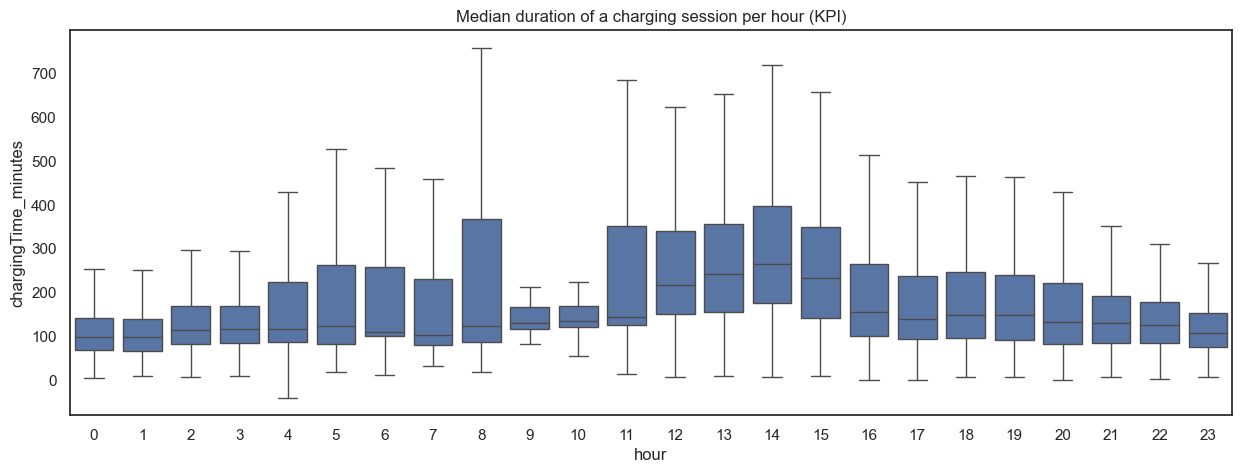

In [85]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour", y = "chargingTime_minutes", data= charging_sessions_modified, ax=axes, showfliers=False)
axes.set_title("Median duration of a charging session per hour (KPI)")

In [86]:
charging_sessions_modified["timeConnected_minutes"] = charging_sessions_modified["timeConnected"]/60

Text(0.5, 1.0, 'Median connection time of a charging session per hour (KPI)')

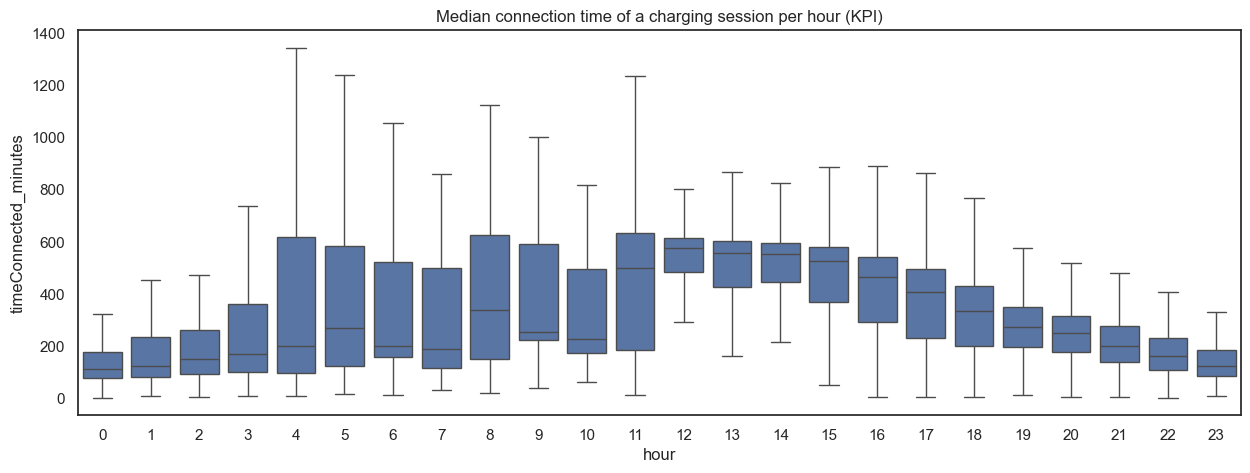

In [87]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour", y = "timeConnected_minutes", data= charging_sessions_modified, ax=axes, showfliers=False)
axes.set_title("Median connection time of a charging session per hour (KPI)")

In [88]:
charging_sessions_modified["idleTime_minutes"] = charging_sessions_modified["idleTime"]/60

Text(0.5, 1.0, 'Median idleTime of a charging session per hour (KPI)')

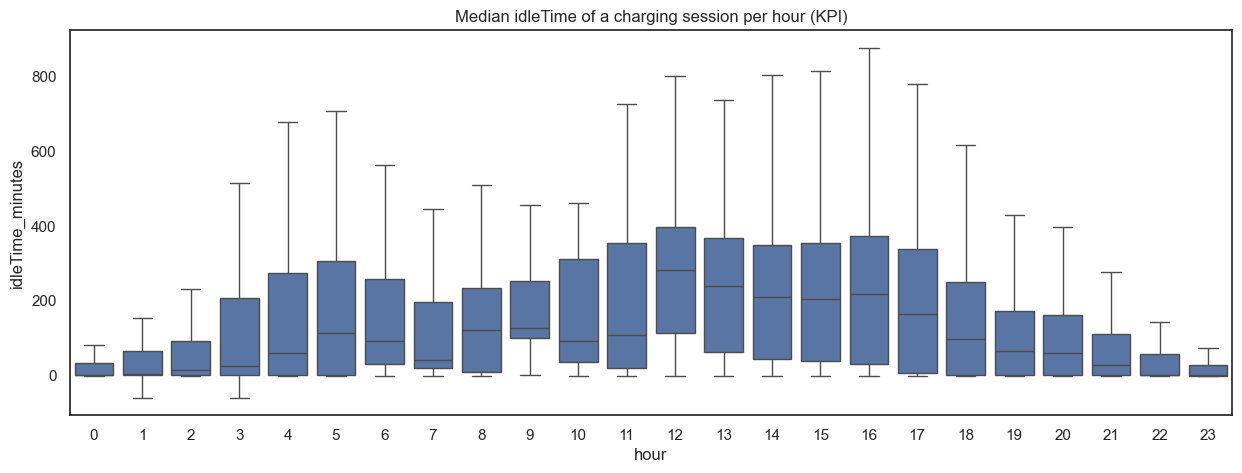

In [89]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour", y = "idleTime_minutes", data= charging_sessions_modified, ax=axes, showfliers=False)
axes.set_title("Median idleTime of a charging session per hour (KPI)")

## General demand

In [ ]:
#plot the total number of borrowed bikes for every hour in the year
#boston_tempered_hour = boston_2018_data_clean.groupby(["Index","hour"])["Bike_Anzahl"].nunique()
#boston_tempered_hour = pd.DataFrame(boston_tempered_hour)
#fig,ax = plt.subplots(figsize=(12,4))
#sns.barplot(x=boston_tempered_hour.index.get_level_values(1), y=boston_tempered_hour["Bike_Anzahl"],ax=ax)
#ax.set_title("total number of bicycles per hour in the year",fontsize=16)
#plt.ylabel('number of borrowed bikes')
#plt.show()

## Proportion of the fleet 

In [90]:
#calculate the number of stations
number_stations = len(charging_sessions_modified["combinedSpaceStationID"].unique())
number_stations

105

In [91]:
#create a dataframe with the number of different stations IDs occupied every hour
charging_sessions_modified_tempered_hour123 = charging_sessions_modified.groupby([charging_sessions_modified["connectionTime"].dt.date,"hour"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_hour123= pd.DataFrame(charging_sessions_modified_tempered_hour123)

In [92]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID
connectionTime hour                        
2018-05-21     16                         1
2018-07-23     22                         1
2018-08-22     4                          1
2018-09-08     0                          1
               2                          1
...                                     ...
2021-09-13     19                         4
               20                         1
               21                         2
               23                         1
2021-09-14     5                          1

[9614 rows x 1 columns]

In this dataframe we see the number of different stations occupied every hour. In the next step we divide it with the number of stages to get the proportion in percent.

In [101]:
#insert a new column with the calculated proportion of the fleet borrowed every hour
charging_sessions_modified_tempered_hour123["percentage"]=(charging_sessions_modified_tempered_hour123["combinedSpaceStationID"]/105)*100

In [102]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID  percentage
connectionTime hour                                    
2018-05-21     16                         1    0.952381
2018-07-23     22                         1    0.952381
2018-08-22     4                          1    0.952381
2018-09-08     0                          1    0.952381
               2                          1    0.952381
...                                     ...         ...
2021-09-13     19                         4    3.809524
               20                         1    0.952381
               21                         2    1.904762
               23                         1    0.952381
2021-09-14     5                          1    0.952381

[9614 rows x 2 columns]

As we can see a third column with percent values

Now we can plot it in a boxplot to the proportion of the stations occupied per day

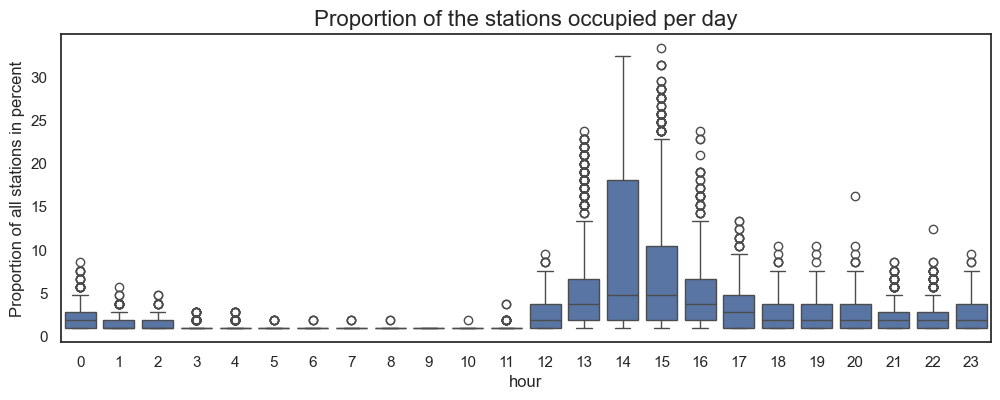

In [103]:
#plot the calculated proportion of the fleet borrowed per day
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_hour123.index.get_level_values(1), y=charging_sessions_modified_tempered_hour123["percentage"],ax=ax)
ax.set_title("Proportion of the stations occupied per day",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.savefig("dayproportion.jpeg")
plt.show()

It also can be interesting to calculate the proportion of the stations occupied per week and the whole year. Because of this we plot two another visualizations for week and year in the same way.

In [104]:
#create a dataframe with the number of different stations IDs borrowed in a week
charging_sessions_modified_tempered_week1= charging_sessions_modified.groupby([charging_sessions_modified["connectionTime"].dt.date,"weekday"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_week1= pd.DataFrame(charging_sessions_modified_tempered_week1)

In [108]:
#insert a new column with the calculated proportion of the fleet borrowed in one week
charging_sessions_modified_tempered_week1["percentage"]=(charging_sessions_modified_tempered_week1["combinedSpaceStationID"]/105)*100

In [110]:
charging_sessions_modified_tempered_week1

,,combinedSpaceStationID,bike_id2,percentage
connectionTime,weekday,,,
2018-05-21,0.0,1,0.952381,0.952381
2018-07-23,0.0,1,0.952381,0.952381
2018-08-22,2.0,1,0.952381,0.952381
2018-09-08,5.0,4,3.809524,3.809524
2018-09-10,0.0,1,0.952381,0.952381
...,...,...,...,...
2021-09-10,4.0,24,22.857143,22.857143
2021-09-11,5.0,6,5.714286,5.714286
2021-09-12,6.0,8,7.619048,7.619048


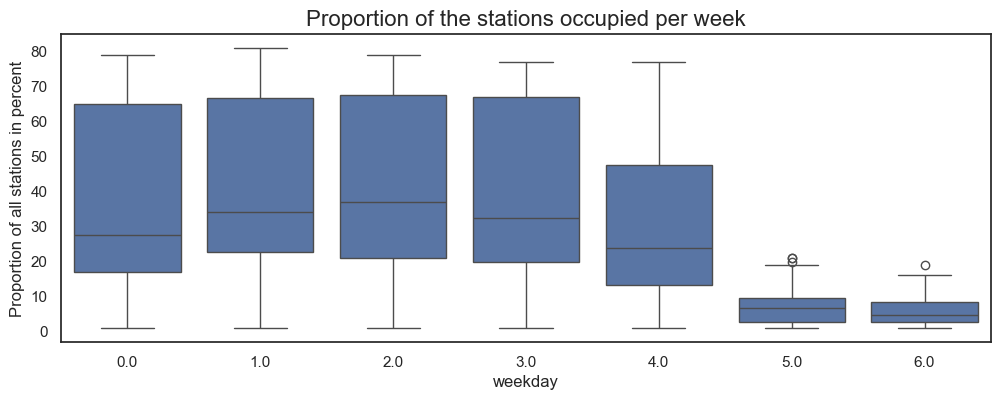

In [109]:
#plot the calculated proportion of the fleet per week
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_week1.index.get_level_values(1), y=charging_sessions_modified_tempered_week1["percentage"],ax=ax)
ax.set_title("Proportion of the stations occupied per week",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.xlabel('weekday')
plt.savefig("weekproportion.jpeg")
plt.show()

In [117]:
#create a dataframe with the number of different stations IDs borrowed in a week
charging_sessions_modified_tempered_year1= charging_sessions_modified.groupby([charging_sessions_modified["connectionTime"].dt.date,"month"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_year1= pd.DataFrame(charging_sessions_modified_tempered_year1)

In [118]:
#insert a new column with the calculated proportion of the fleet borrowed in one week
charging_sessions_modified_tempered_year1["percentage"]=(charging_sessions_modified_tempered_year1["combinedSpaceStationID"]/105)*100

In [119]:
charging_sessions_modified_tempered_year1

,,combinedSpaceStationID,percentage
connectionTime,month,,
2018-05-21,5.0,1,0.952381
2018-07-23,7.0,1,0.952381
2018-08-22,8.0,1,0.952381
2018-09-08,9.0,4,3.809524
2018-09-10,9.0,1,0.952381
...,...,...,...
2021-09-10,9.0,24,22.857143
2021-09-11,9.0,6,5.714286
2021-09-12,9.0,8,7.619048


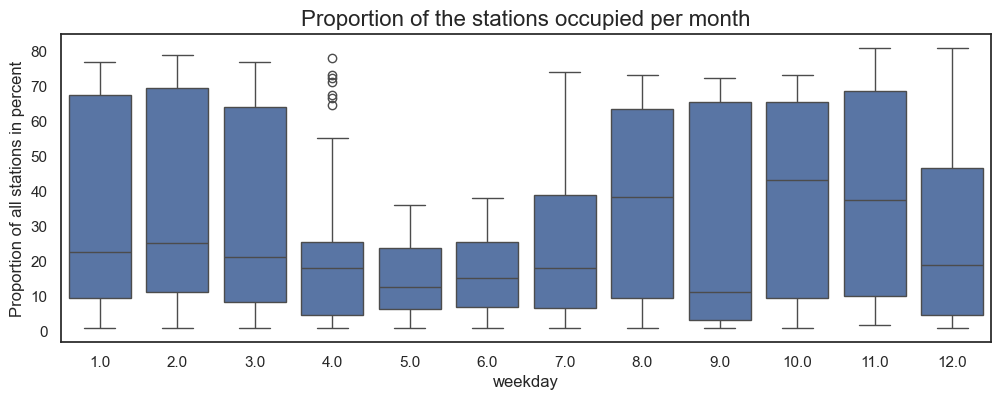

In [120]:
#plot the calculated proportion of the fleet per week
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_year1.index.get_level_values(1), y=charging_sessions_modified_tempered_year1["percentage"],ax=ax)
ax.set_title("Proportion of the stations occupied per month",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.xlabel('weekday')
plt.savefig("weekproportion.jpeg")
plt.show()

#### OLDY

**KPI 2**: Idle Time\
We also found it interesting to compare whether the connectionTime has an influence on how much longer a car is connected to a charging station even though it has already been charged. Thus representing the starting of the charging process and the respective excess connection time to the station. We use boxplots to show the lower and upper quartiles as well as median, max and min.

Text(0.5, 1.0, 'Idle Time / Excess charging time per hour')

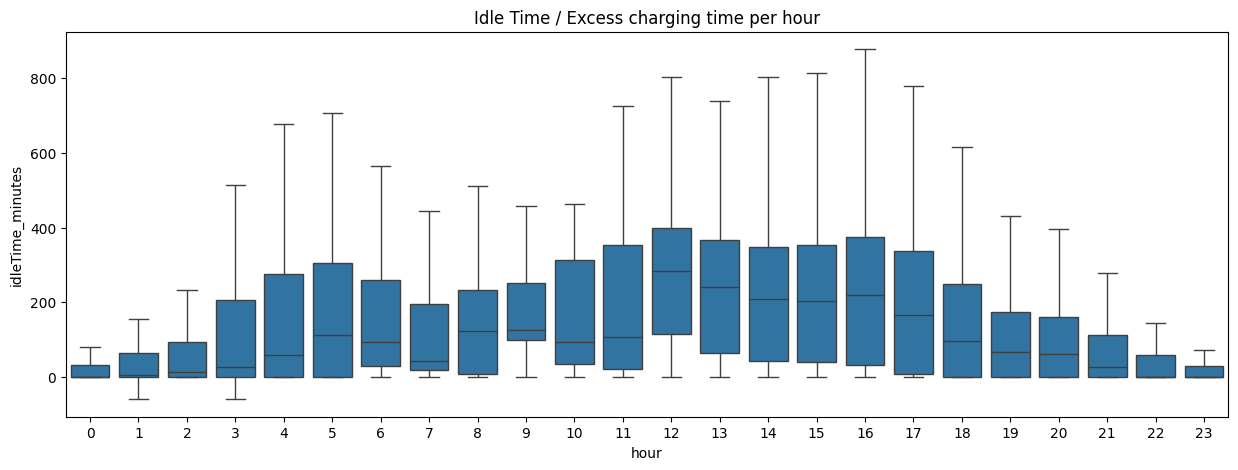

In [106]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour", y = "idleTime_minutes", data= charging_sessions_modified, ax=axes, showfliers=False)
axes.set_title("Idle Time / Excess charging time per hour")

**KPI 3**: Station Utilization\
It can also be interesting how much the stations are used among the hours of the day. By counting the number of charging sessions that are started in a certain hour window.

<Axes: xlabel='hour', ylabel='count'>

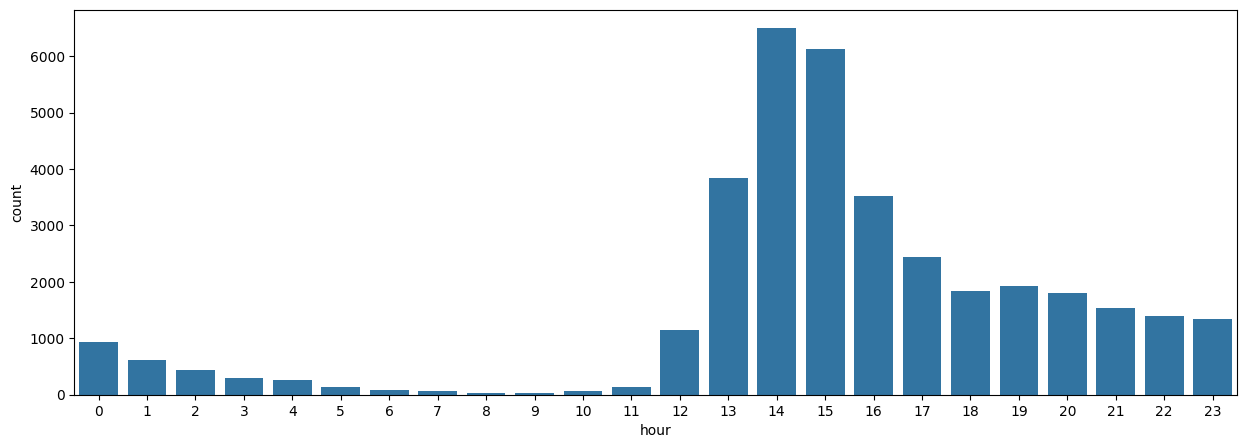

In [108]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.countplot(data=charging_sessions_modified, x="hour")

**KPI 5**: Site Utilization\
The KPI 3 can be viewed separately for the different sites.

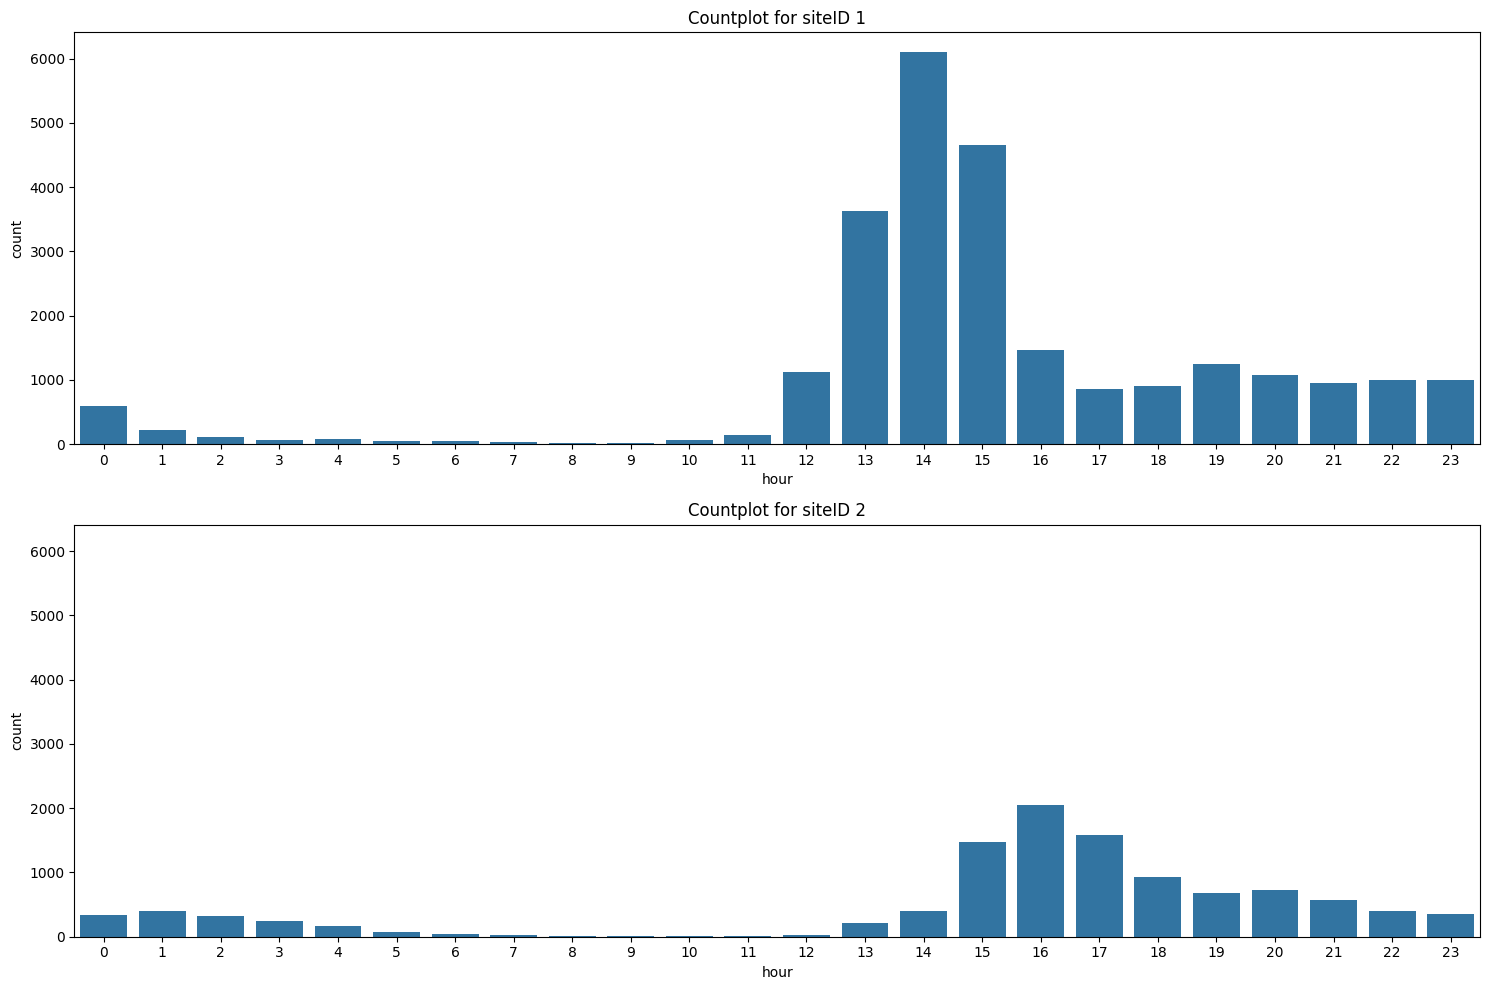

In [109]:
f, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=True)

#For first siteID
sns.countplot(data=charging_sessions_modified[charging_sessions_modified["siteID"] == 1], x="hour", ax=axes[0])
axes[0].set_title('Countplot for siteID 1')

#For second siteID
sns.countplot(data=charging_sessions_modified[charging_sessions_modified["siteID"] == 2], x="hour", ax=axes[1])
axes[1].set_title('Countplot for siteID 2')

plt.tight_layout()

**KPI 6**: Total kWh Charged\
Utilization can also be seen by reviewing the total number of KWh that have been charged at certain times. For visualization we use a boxplot.

Text(0.5, 1.0, 'Median duration of trip per hour throughout the year (KPI)')

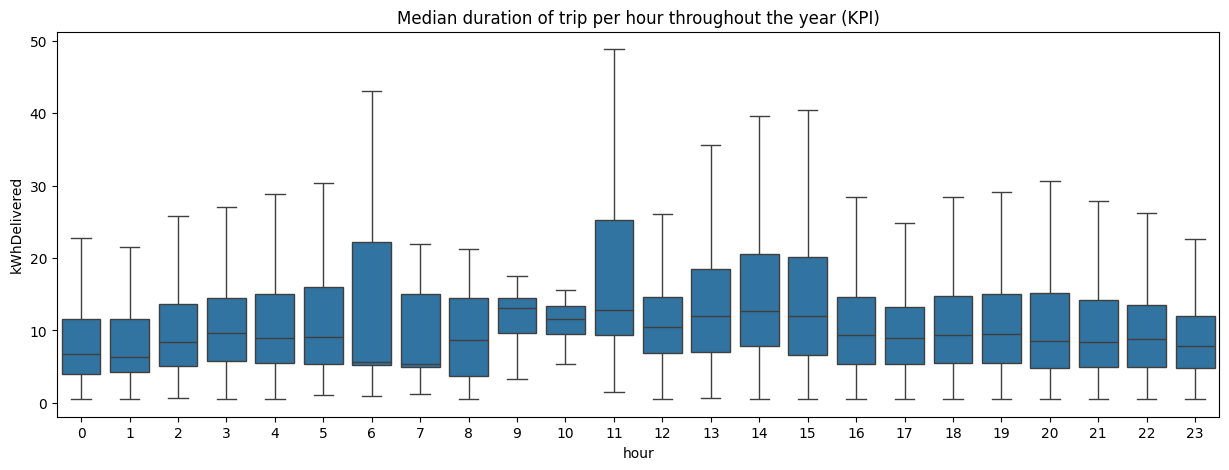

In [89]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour", y = "kWhDelivered", data= charging_sessions_modified, ax=axes, showfliers=False)
axes.set_title("kWh charged per hour")

## OLD

In [ ]:
#KPI1
#Station Downtime Between Sessions
#total accumulated disconnect time
#Description: Measures the duration of time that a charging station remains "free" or inactive before the next connection occurs, indicating how quickly the station is utilized between sessions
# Sortieren Sie das DataFrame nach 'combinedSpaceStationID' und 'disconnectTime'
charging_sessions_modified = charging_sessions_modified.sort_values(by=['combinedSpaceStationID', 'disconnectTime'])

# Berechnen Sie die Downzeiten und speichern Sie sie in einer neuen Spalte 'downTime'
charging_sessions_modified['downTime'] = charging_sessions_modified.groupby('combinedSpaceStationID')['connectionTime'].shift(-1) - charging_sessions_modified['disconnectTime']

# Füllen Sie NaN-Werte in der letzten Zeile der Gruppen mit 0 (da es keine nächste Session gibt)
charging_sessions_modified['downTime'] = charging_sessions_modified['downTime'].fillna(pd.Timedelta(seconds=0))

# Summieren Sie die Downzeiten und berechnen Sie den Durchschnitt für jede 'combinedSpaceStationID'
result = charging_sessions_modified.groupby('combinedSpaceStationID')['downTime'].agg(['sum', 'mean']).reset_index()
result.columns = ['combinedSpaceStationID', 'sumDownTime', 'avgDownTime']

result

**KPI 2.0**: Total Idle Time\
Sums up the idle time per combinedSpaceStationID (in seconds)\
Formula: Sum of idle time per combinedSpaceStationID

**KPI 2.1**: Mean Idle Time\
Calculates the mean idle time per combinedSpaceStationID (in seconds)\
Formula: Mean idle time per combinedSpaceStationID

In [ ]:
result_idle_sum = charging_sessions_modified.groupby('combinedSpaceStationID')['idleTime_minutes'].sum()

result_idle_mean = charging_sessions_modified.groupby('combinedSpaceStationID')['idleTime_minutes'].mean()

print(result_idle_sum)
print(result_idle_mean)

**KPI 3**: Station Utilization\
Quantifies the relation between the total time of usage of a station and the total elapsed time since the first session record\
Formula: (Total Sum of timeConnected) / total hours

first_record = charging_sessions_modified['connectionTime'].min()
last_record = charging_sessions_modified['connectionTime'].max()
#today_date = pd.Timestamp.now(tz = 'Europe/Berlin')
#range = today_date - first_record
range = last_record - first_record

station_utilization = charging_sessions_modified.groupby('combinedSpaceStationID')['timeConnected'].sum()

station_utilization = pd.to_timedelta(station_utilization, unit="s") / range

station_utilization

In [ ]:
#KPI4
#Most Frequently Utilized Stations
#Description: Identifies the stations that are used most frequently based on customer session data
#Group data by 'station_id' and count the number of occurrences
station_usage_counts = charging_sessions_modified['combinedSpaceStationID'].value_counts()

#Sort the stations by usage count in descending order
sorted_stations = station_usage_counts.sort_values(ascending=False)

#Display the most frequently used stations
print("Most Frequently Utilized Stations:")
print(sorted_stations.head(10))  # Adjust the number to display more or fewer stations

**KPI 5**: Site utilization\
Counts the number of session for each site\
Formula: Count of entries for each siteID

In [ ]:
site_usage_counts = charging_sessions_modified['siteID'].value_counts()

sorted_sites = site_usage_counts.sort_values(ascending=False)

print("Most Frequently Utilized Sites:")
print(sorted_sites)

**KPI 6.0**: Total kWh Charged per station\
Sum up energy consumption for each station\
Formula: Sum of energy consumption for each station

**KPI 6.1**: Total kWh Charged (in the last 24 hours) per station\
Sum up energy consumption for each station in last 24 hours\
Formula: Sum of energy consumption for each station in last 24 hours

In [ ]:
total_energy_consumption = charging_sessions_modified.groupby('combinedSpaceStationID')['kWhDelivered'].sum()

timestamp_now = pd.Timestamp.now(tz = 'Europe/Berlin')
total_energy_consumption_recent = charging_sessions_modified[timestamp_now - charging_sessions_modified['connectionTime'] <= timedelta(hours=24)].groupby('combinedSpaceStationID')['kWhDelivered'].sum()

print(total_energy_consumption)
print(total_energy_consumption_recent)

In [ ]:
#KPI7
#Average Energy Delivered per Session
#Formula: (Total kWh Charged) / (Total Number of Sessions)
#Description: Calculates the average energy consumption per charging session, aiding in assessing energy delivery efficiency
overall_average_energy_delivered = charging_sessions_modified['kWhDelivered'].mean()
overall_average_energy_delivered

In [ ]:
#KPI8
#Average Session Duration
#Formula: (Total Session Duration) / (Total Number of Sessions)
#Description: Measures the average duration of charging sessions, assisting in evaluating station turnover rates
avg_session_duration = charging_sessions_modified['timeConnected'].mean()

# Anzeigen oder Verwenden der durchschnittlichen Dauer einer Session
print("Durchschnittliche Dauer einer Session:", avg_session_duration)

In [ ]:
#KPI9
#Peak Demand Hours
#Description: Identifies the hours with the highest energy demand, facilitating load management and pricing optimization

In [ ]:
#KPI10
#Registered and Unregistered Customer Ratio
#Formula: (Number of Registered Customers) / (Number of Unregistered Customers)
#Description: Compares the ratio of registered (loyal) customers to unregistered (casual) customers, providing insights into registration program effectiveness and customer retention


**KPI 11**: Repeating Customer Rate\
Expresses the percentage of customers who return for multiple charging sessions, indicating customer loyalty\
Formula: Number of repeating customers / total number of customers

In [ ]:
number_of_session = len(charging_sessions_modified)
number_of_sessions_with_uf = len(charging_sessions_modified[charging_sessions_modified['userID'].notna()])

number_customer_total = charging_sessions_modified['userID'].dropna().astype(str).nunique()

returning_customer = charging_sessions_modified.groupby('userID').size()
returning_customer = returning_customer[returning_customer > 1].count()


print(
    f"With {number_of_sessions_with_uf/number_of_session:.2f} percent of the charging sessions we can identify the user based on the userID. "
    f"From the {number_customer_total} customers there are {returning_customer} returning users. "
    f"The ratio between returning customers and the total number of customers is {returning_customer/number_customer_total:.2f} percent."
)